<img align="center" src="https://raw.githubusercontent.com/FUlyankin/Parsers/master/images%20/cats.jpg" height="1200" width="1200"> 

# Домашка №3: основы статистики


У всех нас есть датасет по контакту. В нём лежит информация про всех нас. Эту информацию надо как следует проанализировать. Именно этим мы и подолжаем заниматься.

Грамотно расчитывайте свои силы и делайте тот объём заданий, который позволит вам получить желаемую оценку :) 

__Важно:__ за циклы в любом из пунктов вы получаете ноль баллов.

----------------------

Подгрузим данные и посмотрим на первые пять строчек из таблицы.



In [1]:
import pandas as pd

df = pd.read_csv('../data/vk_download/vk_main.csv', sep='\t')
df.head()

,city,country,first_name,home_town,in_hse_memes_group,is_bmm,is_closed,last_name,likes_memes,uid,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
0,Москва,Россия,Александра,Москва,True,True,False,Абашкова,60.0,182152789,...,1.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,42.0,0.428571
1,Рязань,Россия,Анастасия,Рязань,True,True,False,Чуфистова,0.0,148020433,...,2.375000,2.0,1.0,0.105263,0.0,0.0,0.0,0.0,32.0,0.281250
2,Москва,Россия,Александр,Омск,False,True,False,Головачев,0.0,138413935,...,1.400000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,32.0,0.406250
3,NaN,NaN,Анна,NaN,False,True,False,Лобанова,0.0,366261055,...,4.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,45.0,0.333333
4,NaN,Россия,Алексей,NaN,True,True,False,Пузырный,21.0,111252392,...,3.181818,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,41.0,0.341463


__[1] У скольких человек с маркетинга нет авы?__

Используй переменные `is_bmm` и `has_ava_dummy` (значение `True` можно воспринимать как $1$, а `False` — как $0$). 

In [2]:
df[(df.is_bmm == 1) & (df.has_ava_dummy == 0)].shape[1]

98

__[2] Сколько парней/девушек с инстой/без указали в профиле, что знают английский?__  

Эта информация лежит в переменной `english_dummy`. Значение $1$ означает, что английский язык указан в профиле. По аналогии в `instagram_dummy` $1$ означают, что человек оставил ссылку на свою инсту. __Проинтерпретируйте получившиеся цифры.__ 

In [3]:
df_agg = df.groupby(['male_dummy', 'instagram_dummy'])['english_dummy']
df_agg.sum()/df_agg.count()

male_dummy  instagram_dummy
0           0                  0.126437
            1                  0.214286
1           0                  0.142857
            1                  0.185185
Name: english_dummy, dtype: float64

Люди, которые указали инстаграмм, указывают и знание английского языка. Этот вовсе не означает, что люди с инстаграммом лучше знают язык. Скорее всего, они просто более открыты миру и более подробно заполняют свой профиль в социальной сетке. 

__[1] Вывести имена людей, у которых на стенках больше всего эмодзи (топ 5%)__

 Все эмодзи, которые были оставлены на стенке у студента, лежат в колонке `wall_emoji_trace`.  Отсортируйте всех людей из этого топа по числу эмодзи. При работе с табличкой не забудьте заполнить пропуски.

In [ ]:
df['wall_emoji_cnt'] = df['wall_emoji_trace'].fillna('').apply(len)

q = df['wall_emoji_cnt'].quantile(0.95)

df.loc[df['wall_emoji_cnt'] >= q,
       ['first_name', 'wall_emoji_cnt']].sort_values('wall_emoji_cnt', ascending=False)

__[3] Давайте проанализируем колонку со средним кол-во фото в месяц (`photo_month_mean`)__

* Постройте на одной картинке гистограмы для распределения этого показателя по разным полам. 
* Правда ли, что типичная девушка выкладывает значительно больше фотографий, чем типичный мужчина? (подумайте какой именно показатель типичности нужно выбрать для сравнения и обоснуйте почему)
* Для какого пола показатель оказывается более непредсказуемым? (подумайте как именно корректно эту непредсказуемость оценить, обычное стандартное отклонение явно не подходит)

Не забывайте подгрузить пакет `matplotlib`! __Все свои рассуждения пишите прямо по ходу кода! Нет рассуждений => нет баллов!__ 

In [6]:
import matplotlib.pyplot as plt

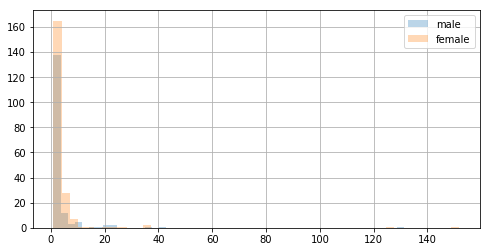

In [8]:
df[df.male_dummy == 1].photo_month_mean.hist(figsize=(8,4), alpha=0.3, label="male", bins=50)
df[df.male_dummy == 0].photo_month_mean.hist(figsize=(8,4), alpha=0.3, label="female", bins=50)
plt.legend();

У распределений длинные хвосты, есть выбросы в данных. Среднее чувствительно к выбросам, значит более корректно сравнивать "типичных" мальчиков и девочек с помощью медиан. 

In [9]:
df.groupby('male_dummy')['photo_month_mean'].agg('median')

male_dummy
0    1.75
1    1.50
Name: photo_month_mean, dtype: float64

Дисперсия, а значит и среднее квадратичное отклонение, чувствительны к выбросам. Чтобы полечить выборку от их тлетворного влияния, нужно сделать срез. Как отсечь выбросы? Ну например, можно считать выбросом всё, что пробивает $95\%$ квантиль. 

In [12]:
q = df['photo_month_mean'].quantile(0.95)
q

10.837499999999999

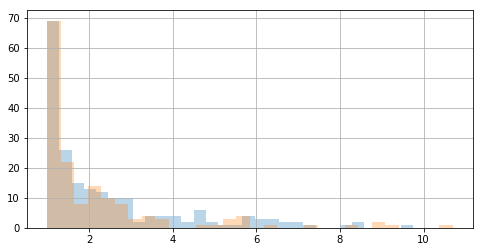

In [17]:
df[df.photo_month_mean < q].groupby('male_dummy')['photo_month_mean'].hist(figsize=(8,4), alpha=0.3, bins=30);

In [19]:
df[df.photo_month_mean < q].groupby('male_dummy')['photo_month_mean'].agg(['mean', 'std', 'median'])

,mean,std,median
male_dummy,,,
0,2.420398,1.815699,1.666667
1,2.130265,1.811635,1.500000


Разброс между группами не различается. Если вы сразу догадались, что данные кишат выбросами и обрезали их, вы вполне себе можете теперь сравнивать типичных представителей по средним. Такой ответ тоже считается правильным. 

__[3] Немного сегментации__

Давайте попробуем разбить всех людей из нашей таблички на равные сегменты по тому сколько у них есть друзей с потока (`friends_from_course_cnt`).  Для этого: 

* Заполните пропуски в переменной `friends_from_course_cnt`  нулями.
* Найдите для переменной `friends_from_course_cnt` квантили уровня $0.25, 0.5, 0.75$. 
* Создайте колонку `segment` и заполните её по следующему принципу: 
    - Поставьте в неё $1$, если у человека друзей меньше, чем квантиль уровня $0.25$ 
    - Поставьте $2$, если у человека друзей от квантиля $0.25$ до $0.5$
    - Поставьте $3$, если у человека друзей от квантиля $0.5$ до $0.75$
    - Поставьте $4$, если у человека друзей от квантиля $0.75$
    
Получившиеся группы - это разные сегменты курса. Одни из них более социальные, другие менее социальные. Используя полученную колонку ответьте на вопросы: 

- Какое направление (БММ или УБ) оказалось более социальным? 
- Правда ли, что более социальные люди чаще лайкают мемы в вышкинской группе? 
- Чётко опишите все выводы, которые вы сделали. 

__Hint:__ для выявления группы для человека можно написать функцию, которая сравнит его число друзей со всеми квантилями и выдаст группу. Потом эту функцию можно применить к колонке с помощью `apply`.

In [43]:
df.friends_from_course_cnt.fillna(0, inplace=True)
q = df.friends_from_course_cnt.quantile([0.25, 0.5, 0.75]).values

In [44]:
def find_segm(friends):
    if friends <= q[0]:
        return 1
    elif (friends > q[0])&(friends <= q[1]):
        return 2
    elif (friends > q[1])&(friends <= q[2]):
        return 3
    else:
        return 4
    
df['segment'] = df.friends_from_course_cnt.apply(find_segm)

In [49]:
# Дальше есть какие-нибудь групп баи вроде таких и пояснения: 
df.groupby(['is_bmm', 'segment']).agg({'segment': 'count'})

segment
is_bmm segment         
False  1             63
       2             68
       3             60
       4             72
True   1             45
       2             42
       3             48
       4             27

In [51]:
df.groupby('segment').agg({'likes_memes': 'mean'})

,likes_memes
segment,
1,22.753623
2,17.550459
3,28.121495
4,29.252525


__Ваши выводы и их обоснование:__ 

- Если тут не будет написано ваших пояснений, за задание вы получаете ноль баллов!

--------

__[n]  Удиви нас. Попробуй найти в данных какую-то классную особенность. Если у тебя это получится, мы поставим дополнительные баллы.__ Если вы найдёте полную фигню (сколько всего друзей у Маши или типа того), баллов не будет. Найденный факт реально должен выносить мозг и сносить крышу.

In [ ]:
# Попробуй меня на вкус!

Настрадался? Выскажи всё, что думаешь обо всём этом [в анонимке по третьему дз.](https://docs.google.com/forms/d/e/1FAIpQLSf5IFDJv8YsZDdkeLN4KXNU64zL9oXMtG5Rp36rsitOYOwYwQ/viewform) 